In [1]:
import pygmsh
import meshio
import os
import tetridiv
from visualisation_helpers import plot_meshio_mesh, create_pyvista_grid_from_meshio

In [2]:
show_args = {}
# For interactive plots, uncomment the following line:
# show_args = {'jupyter_backend': 'panel', 'return_viewer': True}

# 2d Surface Tests

In [3]:
centre = [0.0, 0.0, 0.0]
radius = 1.0
mesh_size = 0.1
with pygmsh.geo.Geometry() as geom:
    geom.add_circle(centre, radius, mesh_size, num_sections = 4)
    pygmsh_mesh = geom.generate_mesh(dim=2)
    pygmsh.write('circle.msh')
mesh = meshio.read("circle.msh")
os.remove("circle.msh")

In [4]:
# Specify points and cells explicitly + remove redundant z coords:
divmesh = tetridiv.tri2quad(points=mesh.points[:,:-1], cells=mesh.cells_dict['triangle'])
divmesh = meshio.Mesh(points=divmesh['points'], cells={'quad':divmesh['cells']})

/home/mabilton/.local/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


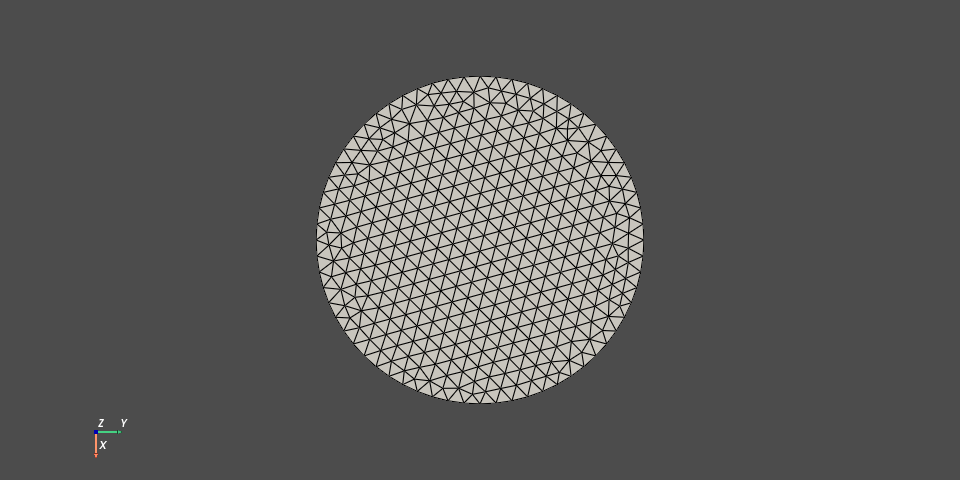

In [5]:
p = plot_meshio_mesh(mesh)
p.show(**show_args)

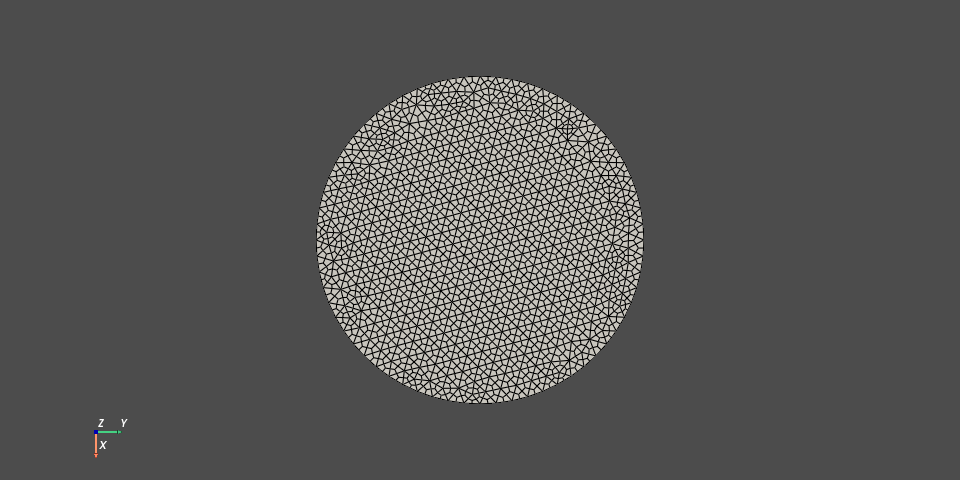

In [6]:
p = plot_meshio_mesh(divmesh)
p.show(**show_args)

# 3d Surface Test

In [7]:
centre = [0.0, 0.0, 0.0]
radii = [1.0, 1.5, 2.0]
mesh_size = 0.1
with pygmsh.geo.Geometry() as geom:
    geom.add_ellipsoid(centre, radii, mesh_size, with_volume=False)
    pygmsh_mesh = geom.generate_mesh(dim=2)
    pygmsh.write('ellipsoid.msh')
mesh = meshio.read("ellipsoid.msh")
os.remove("ellipsoid.msh")

In [8]:
divmesh = tetridiv.tri2quad(mesh)

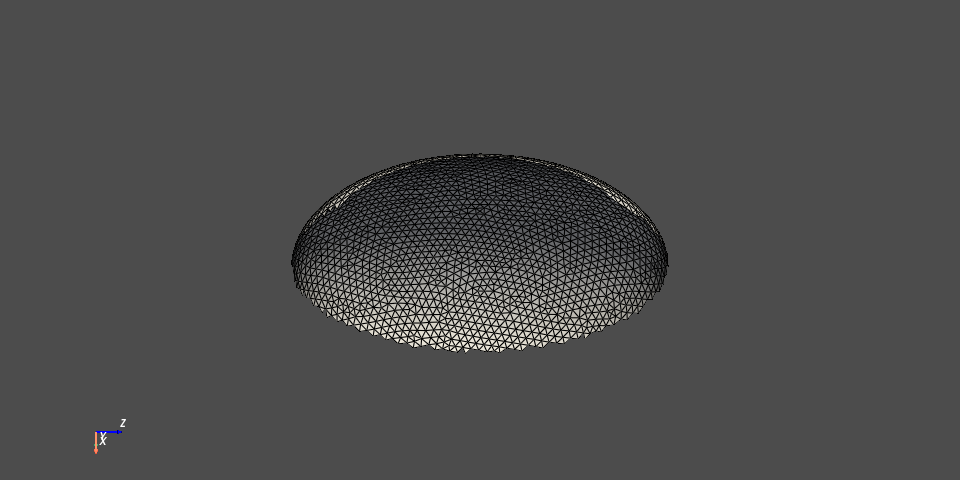

In [9]:
p = plot_meshio_mesh(mesh, slice_mesh=True, cam_pos='yz')
p.camera.elevation += 50
p.show(**show_args)

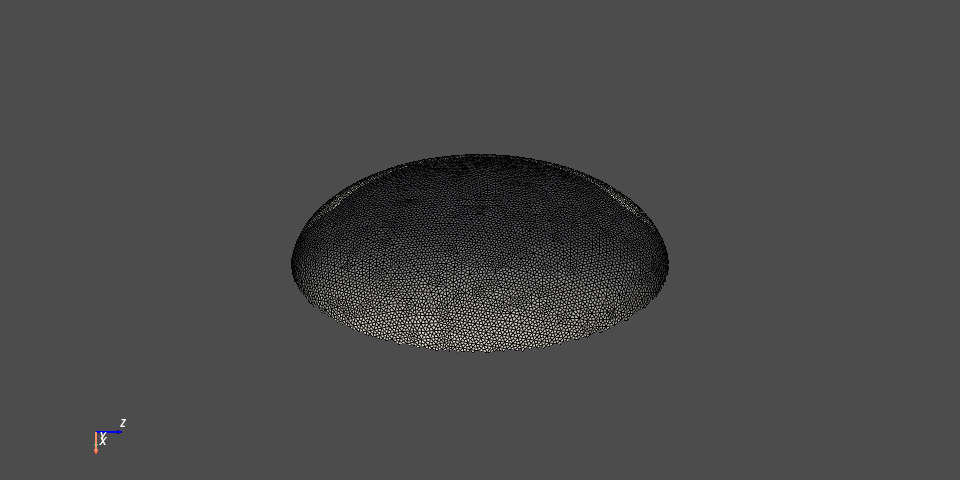

In [10]:
p = plot_meshio_mesh(divmesh, slice_mesh=True, cam_pos='yz')
p.camera.elevation += 50
p.show(**show_args)

# 3d Volume Tests

In [11]:
centre = [0.0, 0.0, 0.0]
radii = [1.0, 1.5, 2.0]
mesh_size = 0.5
with pygmsh.geo.Geometry() as geom:
    geom.add_ellipsoid(centre, radii, mesh_size, with_volume=True)
    pygmsh_mesh = geom.generate_mesh(dim=3)
    pygmsh.write('ellipsoid.msh')
mesh = meshio.read("ellipsoid.msh")
os.remove("ellipsoid.msh")

In [12]:
pyvista_mesh = create_pyvista_grid_from_meshio(mesh)
divmesh = tetridiv.tet2hex(pyvista_mesh)
divmesh = meshio.Mesh(points=divmesh.points, cells={'hexahedron': divmesh.cells_dict[12]})

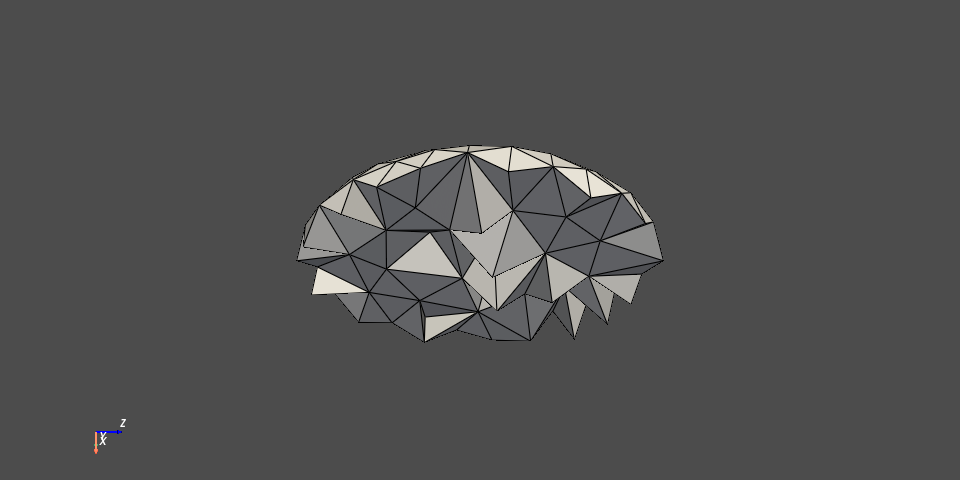

In [13]:
p = plot_meshio_mesh(mesh, slice_mesh=True, cam_pos='yz')
p.camera.elevation += 50
p.show(**show_args)

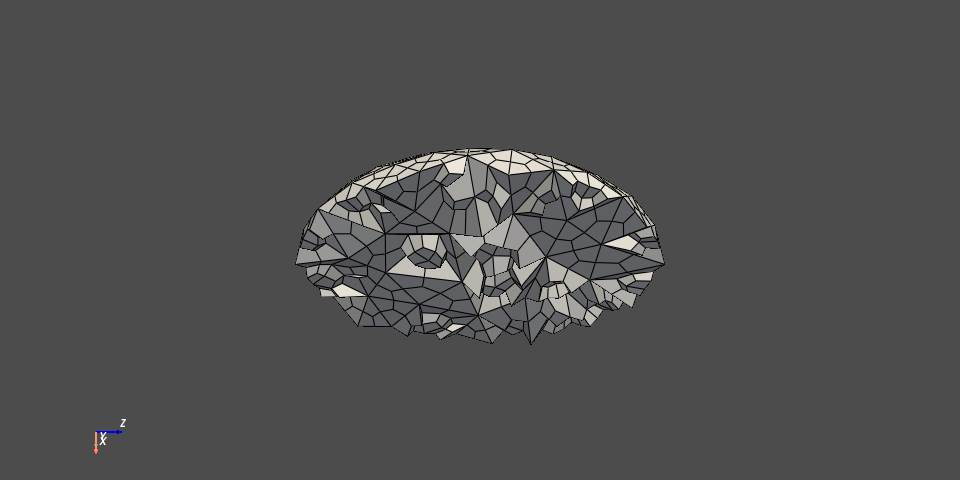

In [14]:
p = plot_meshio_mesh(divmesh, slice_mesh=True, cam_pos='yz')
p.camera.elevation += 50
p.show(**show_args)